<h1><center>Introduction to Computational Neuroscience</center></h1>
<h1><center> Practice II: Data Analysis </center></h1>
<center>Aqeel Labash, Daniel Majoral, Raul Vicente</center>

### Important:
Make sure that you saved your ipynb file correctly to avoid loss of information. Please submit this **ipynb** file only (unless you have extra files then zip this file with the extra ones). Everything should be included in this file questions, answers, codes, plots, and comments about your solutions.

My **Pseudonym** is: <font color='green'>whetear</font> and it took me approximately: <font color='green'>7</font> hours to complete the home work.

The data of how long it took you to complete the home work will help us to improve the home works to be balanced.

***
### 1. Introduction
In this practice session we go through how to work with recordings from brain areas (EEG) and
individual cells (intracranial recording, spiking data). In the lecture we also covered some other
ways of recording brain activity, such as fMRI and MEG. We do not have the time to look at
the data from these imaging techniques, but if you find them fascinating, you can work with
them in your course project.

### 2. Part I: EEG data

In EEG (Electroencephalography) electrodes are placed on different parts of your head and electrical signal is recorded from them. Certain electrodes (on the earlobes, face) do not record the brain activity but are instead used as a reference to filter out noise caused by muscle activity and electrical signals in the room. When all the electrodes are attached, the person looks like this:
![title](imgs/eeg.jpg)

After some preprocessing (filtering out noise with the help of reference electrodes), this is how an usual EEG recording of one channel (signal from one electrode is called a channel) looks like:
![title](imgs/eegrecording.png)

<p style="text-align: center;"> <b>Figure 1:</b> Neuronal response to different orientations of the bar. On the x axis there is time, on the y axis strength of the recorded signal in $μV$. The
dashed line at the time point $x = 1000$ is the moment when the stimulus (picture) was shown
to the test subject. </p> 


***
### Exercise 1: Event Related Potential (ERP) (1pt)
Event related potentials are brain activity changes in response to certain events. For example, we expect that some brain regions change there activity after a person hears a sound. Consider Figure 1, the test subject was shown a stimulus at $T=1000$. From the plot we can not conclude that the stimulus had an effect on the subject’s brain activity (as measured by
this specific electrode). There seems to be a voltage increase at $T=1200$ that ends at $T=1500$, but it could be a random event not related to the stimulus. The plot EEG signal is too noisy to tell.

To remove the noise and reach conclusions on the effect of the stimulus, scientists conduct the same experiment several times and then average the results. In each trial the noise is different and will cancel out if we average over trials. Therefore if there is a brain response, will appear much more clearly.

In the data folder you have the file erptrials.csv. Each row is one trial recorded for 2 seconds with sampling rate of 1000 Hz. The stimulus was shown at the time point 1000 (1 second). There are 79 trials in this file. Your task is to plot an average of all 79 trials to see if there is a clear ERP response or not.

1. Plot an average of all 79 trials to see if there is a clear ERP response or not. Add a red vertical line at T=1000 like on Figure 1 (Don't forget to name the axis on your plot).


In [1]:
# You can use any library you want but remember to draw the plot.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

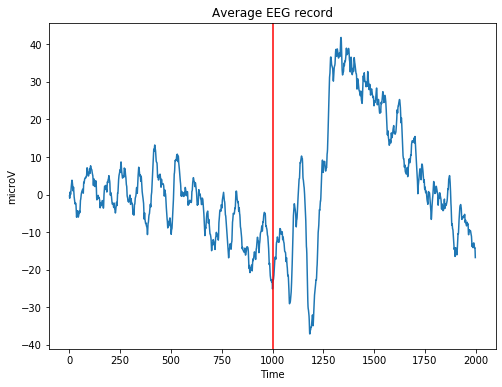

In [2]:
erp_data = None
erp_average = None

################################
##### YOUR CODE STARTS HERE ####
# Hints: you can use pd.read_csv to read the data and np.mean to average it.
################################
erp_data = pd.read_csv("data/erptrials.csv", header=None)

erp_average=erp_data.mean()

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(erp_average)

plt.ylabel('microV')
plt.xlabel('Time')

plt.axvline(1000, color='r')

##### YOUR CODE ENDS HERE  #####
################################

plt.title("Average EEG record")
plt.show()

2. How many milliseconds after the stimulus presentation does the ERP happen?

<font color='green'>250 ms</font>

3. How long does it take for the EEG signal to return to normal range?

<font color='green'>1000 ms</font>

***
### Exercise 2: Frequency Analysis (2pt)
The most popular operation that you can do with continuous brain data such as EEG is converting it from the time domain to the frequency domain. It is known that any function can be represented as a sum of sinusoids (Fourier transform). Therefore we can decompose our signal into such sinusoids and observe the different frequency components. For brain data such transformation makes particular sense, because of the brain rhythms – different frequencies of the firings of the neurons are related to the different kinds of mental activity [1](http://en.wikipedia.org/wiki/Electroencephalography#Wave_patterns) .

In this exercise we will plot the power spectrum (like the two plots below) and see how alpha wave (brain oscillation at 8-13Hz) emerges when the test subject’s eyes are closed. In the data folder you can find two files: eyes open.csv and eyes closed.csv. The data is recorded from the channel Pz (you can google where it is located). One row contains 4 seconds of the signal, sampling rate is 512. Each file has 15 recordings.

Your task is to perform Fourier analysis on both datasets, plot power spectra and compare the
results. Do it as follows:
1. Plot one or two of the signals just to see how they look like.

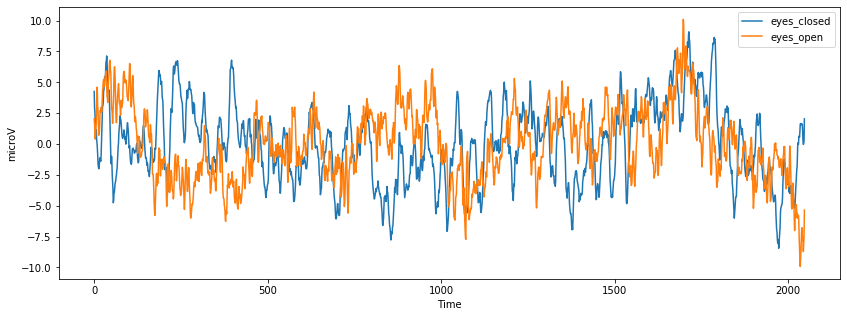

In [3]:
################################
##### YOUR CODE STARTS HERE ####

eyes_closed_data = pd.read_csv("data/eyes_closed.csv", header=None)

eyes_open_data = pd.read_csv("data/eyes_open.csv", header=None)


fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(eyes_closed_data.mean())

ax.plot(eyes_open_data.mean())

plt.ylabel('microV')
plt.xlabel('Time')

ax.legend(['eyes_closed', "eyes_open"])

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

<font color='green'>
From this we can see that the brain activity is different when the subject has his/hers eyes closed or open.
</font>

2. For each recorded signal (2048 data points):
    1. Use `np.fft.fft(signal)` to compute power spectrum of this signal. You will get a vector of complex numbers.
    2. Use `np.abs(result of fft)` to obtain the magnitude. `np.abs(result of fft)^2` will give you power.
3. Sum together the 15 power spectrum distributions, that you got from the previous step.
4. And divide the resulting vector by 15 to obtain the average.
5. Plot it (You need two plots, one for eye open and another for eye closed). 

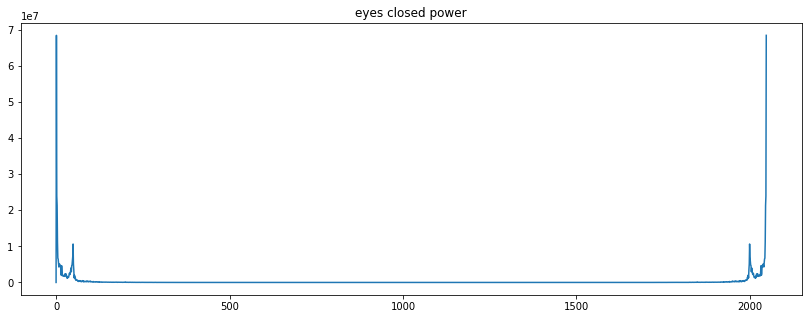

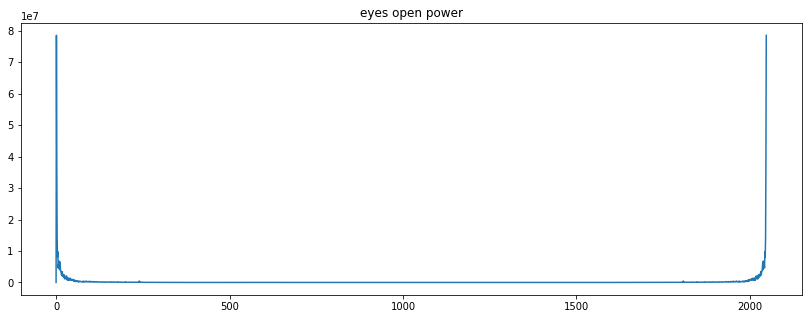

In [4]:
################################
##### YOUR CODE STARTS HERE ####
# Hint: you can use a for loop or take advantage of numpy matrix operations

eyes_closed_power = [ i/15 for i in np.sum((np.abs(np.fft.fft(eyes_closed_data))**2), axis=0)]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(eyes_closed_power)

plt.title("eyes closed power")

eyes_open_power = [ i/15 for i in np.sum((np.abs(np.fft.fft(eyes_open_data))**2), axis=0)]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(eyes_open_power)

plt.title("eyes open power")

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

6. You will see that the right part of the graph is mirror image of the left part. Discard the right part and plot it again.

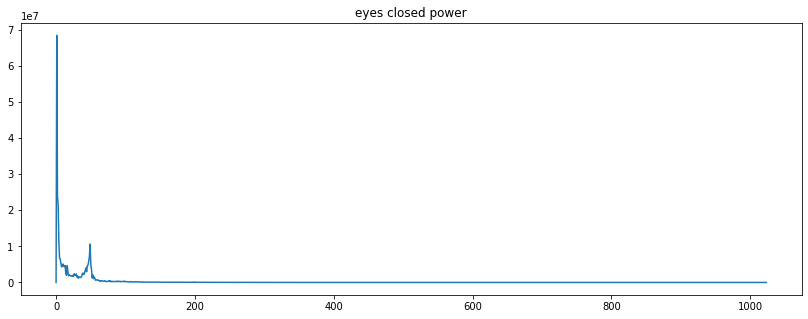

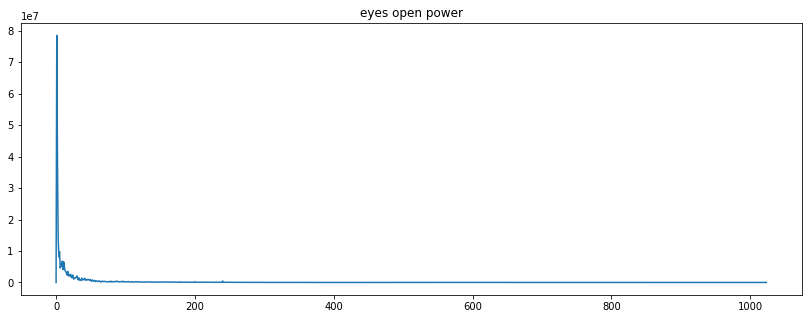

In [5]:
################################
##### YOUR CODE STARTS HERE ####

eyes_closed_power = [ i/15 for i in np.sum((np.abs(np.fft.fft(eyes_closed_data))**2), axis=0)]
eyes_closed_power = eyes_closed_power[0: int(len(eyes_closed_power)/2)]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(eyes_closed_power)

plt.title("eyes closed power")

eyes_open_power = [ i/15 for i in np.sum((np.abs(np.fft.fft(eyes_open_data))**2), axis=0)]
eyes_open_power = eyes_open_power[0: int(len(eyes_open_power)/2)]

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(eyes_open_power)

plt.title("eyes open power")

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

7. Your X axis goes from 1 to 1024, which does not correspond to actual frequencies. Compute correct X axis as follows and plot it afterward:

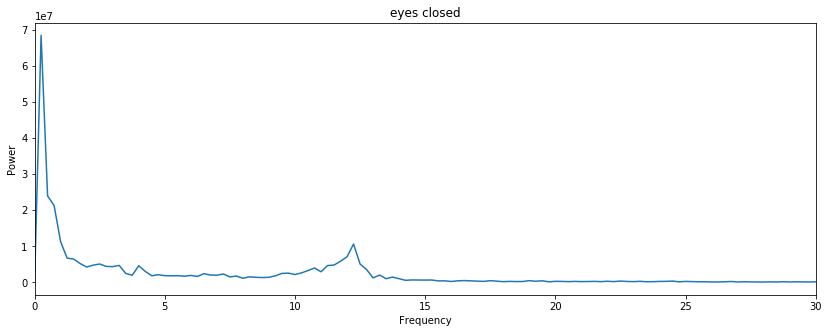

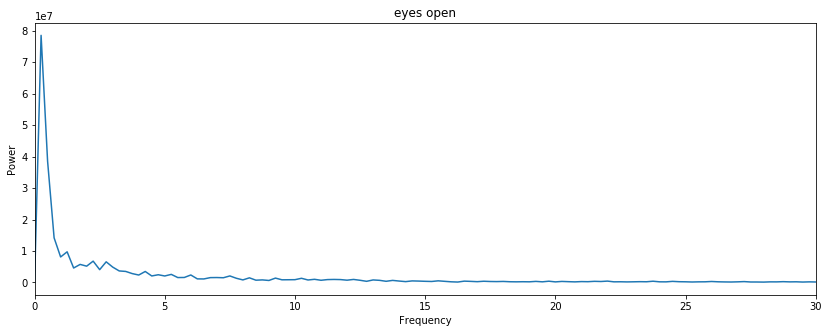

In [6]:
dt= 1/512                   # time step length in ms
df = 1/4                    #frequency step in Hz, 4 corresponds to the length of recording
fNQ = 1/dt/2                #fNQ is the maximal frequency, in our case it is
                            #256 if you have discarded part of the data in step 5
xaxis= np.arange(0,fNQ,df)  #points for your X axis, should be of the same length
                            #as the vector of frequencies

################################
##### YOUR CODE STARTS HERE ####

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(xaxis, eyes_closed_power)

ax.set_xlim(0, 30)

plt.title("eyes closed")

plt.ylabel('Power')
plt.xlabel('Frequency')

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(xaxis, eyes_open_power)

ax.set_xlim(0, 30)

plt.title("eyes open")

plt.ylabel('Power')
plt.xlabel('Frequency')

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

<font color='green'>From the plot we can see, that the signal is made up mostly from frequencies around 0hz, but when the test subject has his/hers eyes closed, there is a frequenci spike at 12hz</font>

Now your axis goes from 0 to 256 (or 512 if you did not discard the right side of the graph)
with step of 0.25. This corresponds to the frequency range pow function produced.
After making the plot more beautiful and focusing only on the range from 0 to 30 Hz you should
obtain a result that looks something like this:

Eyes open             |  Eyes Closed
:-------------------------:|:-------------------------:
<img src="imgs/eyes_open.png" alt="Drawing" style="width: 400px;"/> |  <img src="imgs/eyes_closed.png" alt="Drawing" style="width: 400px;"/>

***
### 3 Part II: Spiking Data

In the first part we looked at continuous brain data: the EEG signal was changing over the
time. Another very popular form of data is spiking data. Spiking data is obtained when we
insert electrodes inside the brain and record the activity of individual neurons. The concept
is very simple: we attach a sensor to the neuron and whenever the neuron emits and action
potential (aka ”fires”) we write a “1” into our data file, otherwise we write a “0”. The resulting
data shows us for each time point (in our case each millisecond) whether the neuron has fired
or not.

### 3.1 Dataset 
We will be working with a dataset with spiking data recorded
from 72 neurons. The data was recorded from one mouse while
received a stimulus: moving bars on the screen which can have
different orientations. On <b>Figure 2</b> you can see an example: the
white and black bars are tilted (orientation). The bars also move
in the direction perpendicular to the tilt during the experiment.
![](imgs/orientationstimulus.jpg)
 <p style="text-align: center;"> <b>Figure 2:</b> Example of the stimulus. During the actual experiment the bars are moving. </p> 
 
We want to find if different neurons react differently to moving bars with different orientations. Have a look at **Figure 3** the spiking pattern could indicate that this neuron is more active when the bar is tilted $45^{o}$ clockwise from the horizontal position. Also the neuron activity seems to fade for orientations away from $45^{o}$. We would like to rediscover from the data, that indeed different neurons respond differently to different orientations.

![](imgs/orientation.jpg)
<p style="text-align: center;"> <b>Figure 3:</b> Neuronal response to different orientations of the bar. </p> 

<b>NB:</b> Note that in the dataset, we have 13 stimuli (13 orientations), but the first one should be ignored (it has orientation $-1^o$). So you should only use the other 12.


***
### Exercise 3: Raster plots (2pt)

Let us start by plotting some spiking data. Under the **data/plain** folder you have recordings from 72 neurons of a mouse. The data is available in the plain text format.

The files have names **neuron_NN_stimulus_SS.csv** where **NN** is the number of the neuron (from 1 to 72) and **SS** is the number of the stimulus (from 1 to 13). Inside each file one line represents one trial. For each millisecond it has value 0 (no spike) or 1 (spike). Files with names **stimulus_SS.csv** describe the stimulus: they hold four values:
1. Time before the stimulus (in seconds).
2. Duration of the stimulus (in seconds).
3. Time after the stimulus (in seconds).
4. Orientation of the stimulus (in degrees).

**Your task is**:
1. Take any of the neurons and plot all trials as a raster plot (see Figure 4). You will notice that neuronal response to the stimulus varies a lot (lot of noise!), this is why you usually need several trials.
![](imgs/raster10tr.png)
 <p style="text-align: center;"> <b>Figure 4:</b> Raster plot of 10 trials on the same neuron. On the $X$ axis we have time and on the $Y$ axis trials. A vertical bar indicates a spike in that trial.</p> 

 To draw a vertical line in Python you can use
	`plt.vlines(spike_time,y_min,y_max)`
where **spike_time** is the time and **y_min,y_max** is the length of the line which should corrospond to the trial. If necessary modify the length the bars to make the raster plot more readable.

In [7]:
#Import all the data

data = {}; #Create a dictionary to store the data.
data_path = "./data/plain/" # data path
for n in range(1, 73): #loop over 72 neurons
    neuron = []
    for s in range(2, 14): #loop over 12 stimulus
        print('Loading neuron:{},stimiulus:{} '.format(n,s),end="\r")
        #Get the specific stimilus spikes for specific information in to the list.
        neuron.append(np.genfromtxt(data_path + "neuron_%02d_stimulus_%02d.csv" % (n, s), delimiter=','))
    data[n] = np.array(neuron)

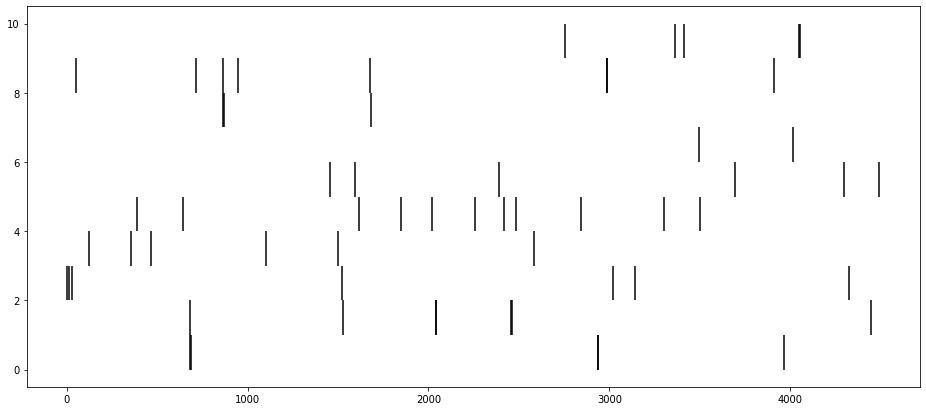

In [135]:
plt.rcParams['figure.figsize'] = (16, 7)
################################
##### YOUR CODE STARTS HERE ####
            
for i in range(1):
    for j in range(data[1][i].shape[0]):
        for k in range(data[1][i][j].shape[0]):
            if data[1][i][j][k] == 1.0:
                plt.vlines(1*k,j,j+1)

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

<font color='green'>From here i cant tell any pattern</font>

The next step is to **create two more raster plots**. The first one will illustrate the behaviour of all the neurons under the same stimulus, while the other one will have responses of the same neuron but to the different stimuli.
2. Raster plot, where on $X$ axis we have time and on $Y$ axis we have all 72 neurons. Vertical bars are the responses to a stimulus (choose any) by the corresponding neuron in any of the trials (!). Please note that in our dataset different recordings have different length, but this should not be a problem. **(neuron to neuron variability)**

**Hint:** For task 2 plots, we need to average spiking data over the trials so that each neuron would be represented by only one vector, not 10. Simplest way to do that is just to add trials together. Let us say that you have 10 trials, and each of them is a vector of 4500 time points. You just sum those vectors together to obtain one vector of length 4500. After that replace all values which are greater than 1 with 1 (meaning if there was a spike in that time point in at least one of the trials).

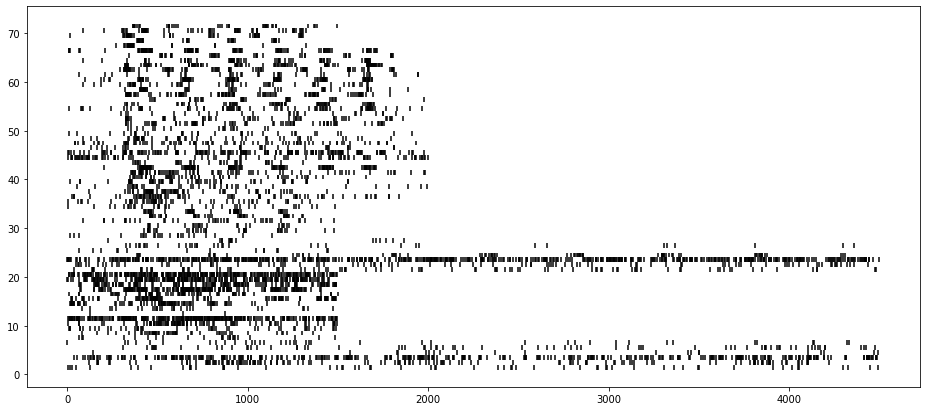

In [133]:
################################
##### YOUR CODE STARTS HERE ####

for i in range(1, 72):
    for j in range(1):  
        trialSum = sum(data[i][j])
        for k in range(trialSum.shape[0]):
            if trialSum[k] != 0:
                plt.vlines(1*k,i,i+1)
                
##### YOUR CODE ENDS HERE  #####
################################
plt.show()

<font color='green'>
    From this plot you can see that the most intensive spiking occurs arround 250ms and lasts till 1500 - 2000 ms <br/>
    The stimulus started 250ms and ended 1000ms.
</font>

3. Raster plot, where on $Y$ axis we have all 12 stimuli and bars are the responses from the same neuron (choose any). **(variability across stimuli)**

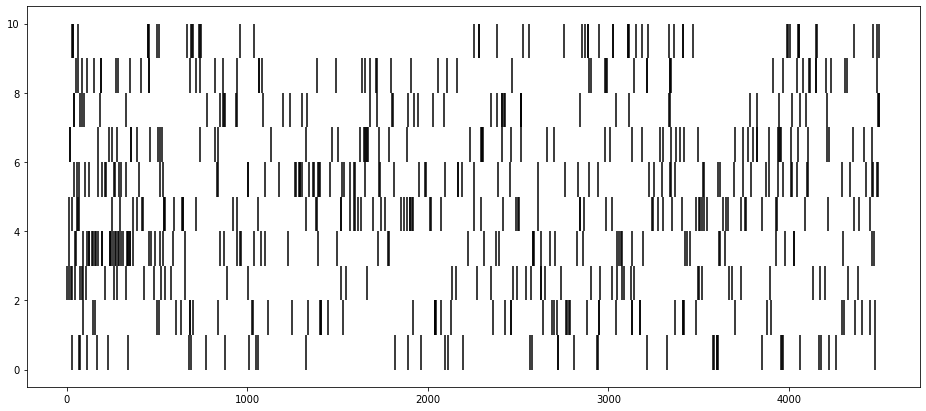

In [134]:
################################
##### YOUR CODE STARTS HERE ####


for i in range(data[1].shape[0]):
    for j in range(data[1][i].shape[0]):
        for k in range(data[1][i][j].shape[0]):
            if data[1][i][j][k] == 1.0:
                plt.vlines(1*k,j,j+1)

##### YOUR CODE ENDS HERE  #####
################################
plt.show()

<font color='green'>
From this plot you can see that the subject reacted the most to the 4,5,6 stimulus. From that we can conclude that the neurons are tuned to 60 - 120° orientation of bars.
</font>

***
### Exercise 4: Tuning Curve as Rose Diagram (2pt)
From the lecture you must be familiar with the term **receptive field**. **Tuning curve** is a plot that helps to describe the receptive field of a neuron with respect to some variable - how strongly does the neuron respond (how often it fires) if we give the variable different values. Figure 3 describes how a neuron's response varies for different orientations of the bar, the plot on the right is the tuning curve of this neuron (with respect to orientation).

For orientations of bars there is a really neat way to visualize the tuning curve. This visualization method is called **rose chart** or **angle histogram**. You can see an example on **Figure 5**. The idea is that the values are placed on the circumference on the circle and the length of the sector is determined by the number of times the value appears in the list. It is like a histogram drawn in circle.

In our case it allows to represent our data in a much more natural way because different orientations form a circle. In our case the lengths of the sectors correspond to sum of spikes in this orientation. There are rose charts for some of the neurons on **Figure 5**. We can clearly see that neuron 8 reacts more to the orientation of $0^{o}$, the neuron 6 is most active in the range of $270^{o}$ to $330^{o}$ and so on.

![](imgs/rosediag.png)
 <p style="text-align: center;"> <b>Figure 5:</b> Rose diagram: the number of spikes for each of the 12 orientations.</p> 

**Your task is** to produce similar plot for any 9 neurons (not the same ones as on previous figure). To produce a plot for one neuron do the following:
1. Create a dictionary **rose_neurons** where you store an array **A**  for every neuron of the 9 you picked.
2. **A** array contain the number of spikes for every orientation (notice that this array is neuron dependant.


In [166]:
rose_neurons={}
################################
##### YOUR CODE STARTS HERE ####
#Note: Every array A should include 12 values (value per orientation)

for i in range(1, 10):
    x = []
    for j in range(12):
        x.append(sum(sum(data[i][j])))
    rose_neurons[i] = x

##### YOUR CODE ENDS HERE  #####
################################

3. Draw the plot.

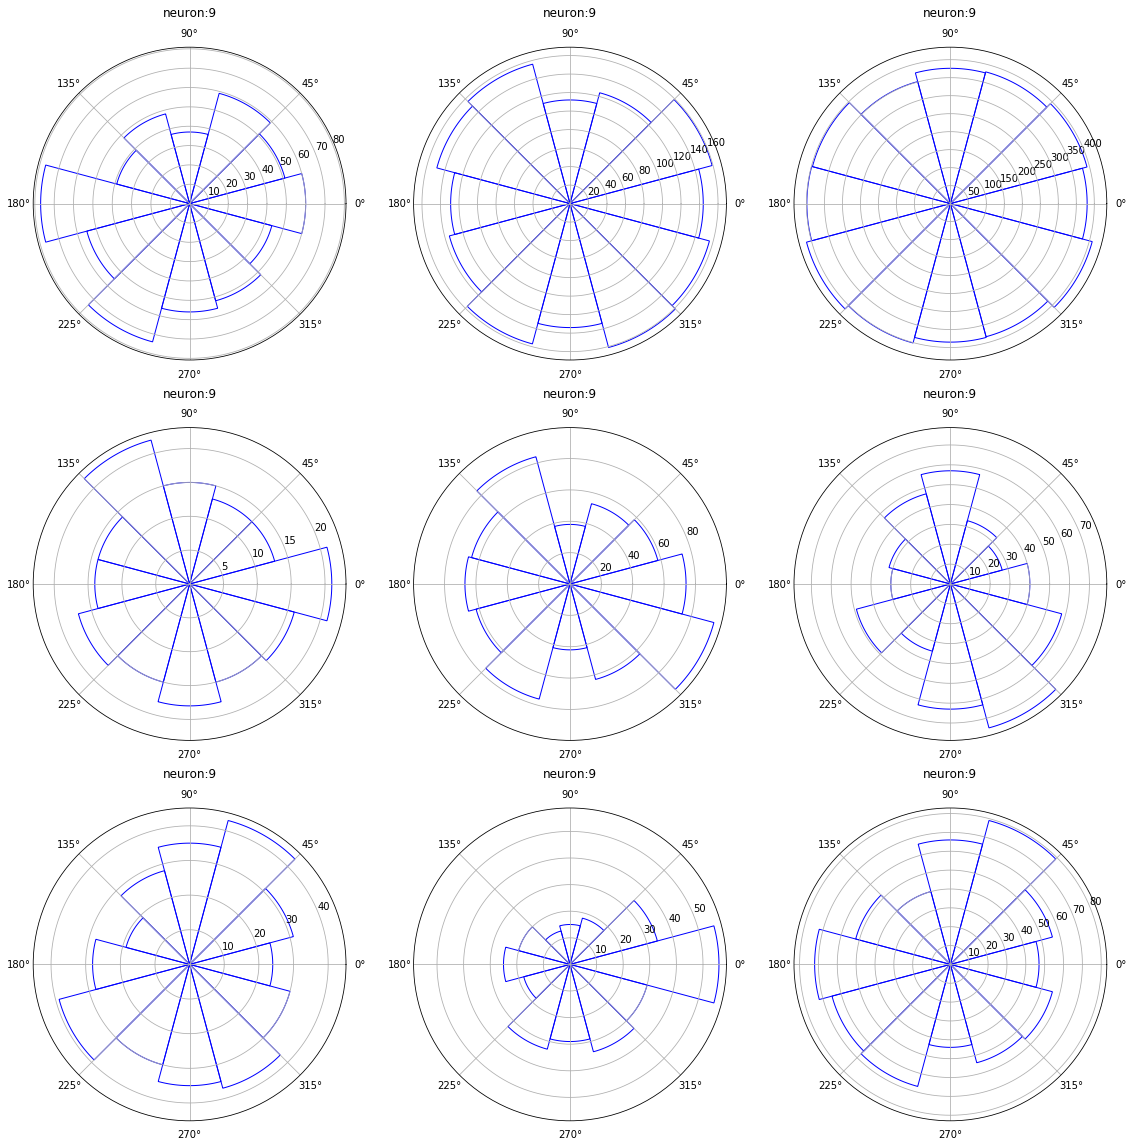

In [160]:
plt.rcParams['figure.figsize'] = (16, 16)

#Array with the angles of bins
Angels = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
RadAngels = np.deg2rad(Angels)
counter=0

#Loop over the picked neurons
for j in rose_neurons.keys():
    
    #Making the plot polar.
    ax = plt.subplot(3,3,1+counter,projection='polar')
    #Draw the rose table using matplotlib
    ax.bar(RadAngels,rose_neurons[j],width=2*np.pi/12,edgecolor='blue', color='None')
    ax.set_title('neuron:{}'.format(i),pad=15)
    counter+=1
plt.tight_layout()

4.  Also, look through the diagrams you obtain and point out which neuron has the most specific tuning curve and which direction it prefers.

<font color='green'>
The neoron 8 has the most specific tuning curve and is tuned to 0°.
</font>

***
<h2><center>End of obligatory exercises</center></h2>

***

### Exercise 5 What else our neurons are tuned to? (Bonus: up to 1)

In this session we have seen an example of how neurons are **tuned** to respond to very specific stimuli. Your task is to find  other interesting examples of stimuli our neurons are tuned to react to. Are there special neurons, which fire when you look at a human face? Neurons which react on the temperature? Hunger? Numbers?

Find the most interesting examples (from  humans, animals, insects). Write at least 150 words (images, charts, plots are recommended).

<font color='green'>[Your Answer Here]</font>

***
### Exercise 6 Post-Stimulus Time Histogram (PSTH) (Bonus 1)
Another useful analysis tool is a histogram, where on $X$ axis we have time points (or time ranges) and on $Y$ axis the number of spikes that occurred during given time range. It is called **Post-Stimulus Time Histogram (PSTH)**.
1. Choose any neuron, any stimulus.
2. Take an average over all trials as we did before.
3. Choose time window, for example 20ms or 50ms.
4. Plot a histogram, where on the $X$ axis we have time windows and on the $Y$ axis the numbers of spikes that occurred during those windows.

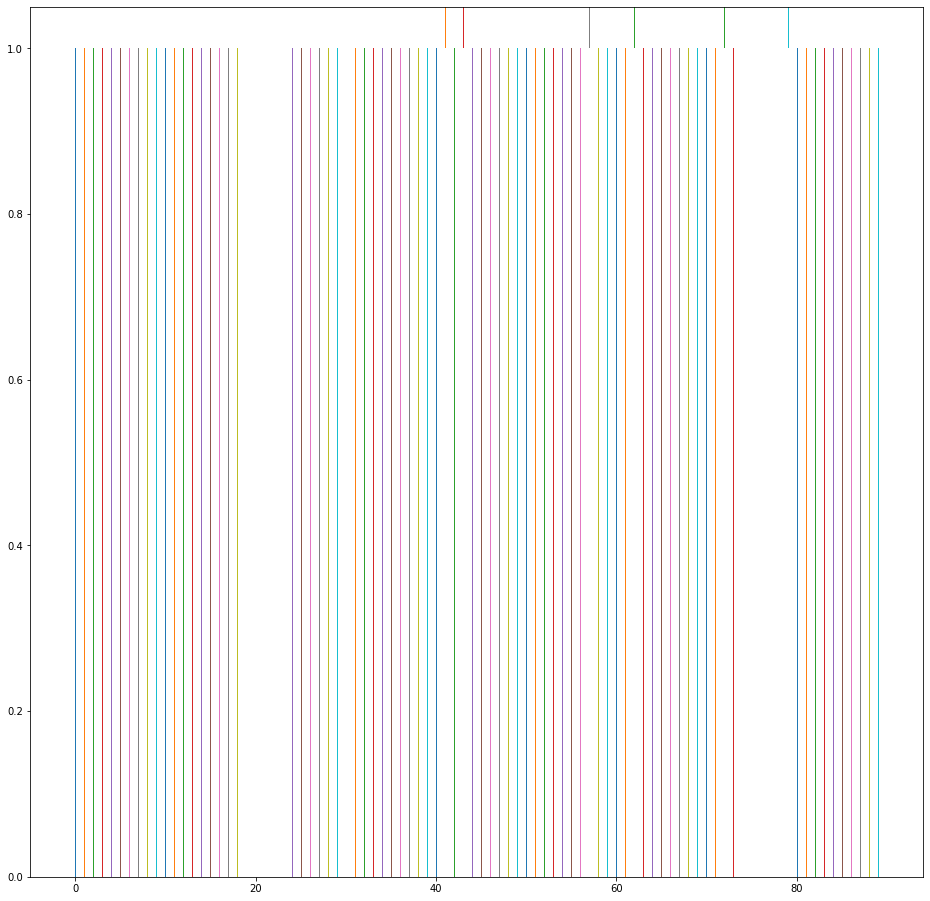

In [211]:
################################
##### YOUR CODE STARTS HERE ####

y = sum(data[3][0])

histBins = []

for i in range(1, len(y), 50):
    for j in range(50):
        tempSum = 0
        tempSum += y[i+j];
    histBins.append(tempSum)


##### YOUR CODE ENDS HERE  #####
################################